In [394]:
# Import pandas into the invironment
import pandas as pd 

# Importing csv dataset
marketing = pd.read_csv('datasets/marketing_new.csv', parse_dates=['date_served', 'date_subscribed','date_canceled'])
# Print first rows of dataframe
print(marketing.head())

   Unnamed: 0     user_id date_served marketing_channel          variant  \
0           0  a100000029  2018-01-01         House Ads  personalization   
1           1  a100000030  2018-01-01         House Ads  personalization   
2           2  a100000031  2018-01-01         House Ads  personalization   
3           3  a100000032  2018-01-01         House Ads  personalization   
4           4  a100000033  2018-01-01         House Ads  personalization   

   converted language_displayed language_preferred    age_group  \
0       True            English            English   0-18 years   
1       True            English            English  19-24 years   
2       True            English            English  24-30 years   
3       True            English            English  30-36 years   
4       True            English            English  36-45 years   

  date_subscribed date_canceled subscribing_channel  is_retained  DoW  \
0      2018-01-01           NaT           House Ads         True  0

In [395]:
marketing['is_retained'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10037 entries, 0 to 10036
Series name: is_retained
Non-Null Count  Dtype
--------------  -----
10037 non-null  bool 
dtypes: bool(1)
memory usage: 9.9 KB


In [396]:
# Add new day of week column
marketing['DoW'] = marketing['date_served'].dt.day_of_week
marketing['DoW'].value_counts()

0.0    1993
2.0    1644
1.0    1629
5.0    1275
4.0    1170
3.0    1156
6.0    1154
Name: DoW, dtype: int64

In [397]:
# Print information about dataframe
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           10037 non-null  int64         
 1   user_id              10037 non-null  object        
 2   date_served          10021 non-null  datetime64[ns]
 3   marketing_channel    10022 non-null  object        
 4   variant              10037 non-null  object        
 5   converted            10037 non-null  bool          
 6   language_displayed   10037 non-null  object        
 7   language_preferred   10037 non-null  object        
 8   age_group            10037 non-null  object        
 9   date_subscribed      1856 non-null   datetime64[ns]
 10  date_canceled        577 non-null    datetime64[ns]
 11  subscribing_channel  1856 non-null   object        
 12  is_retained          10037 non-null  bool          
 13  DoW                  10021 non-

In [398]:
# Changing datatype of a column
marketing['is_retained'] = marketing['is_retained'].fillna(False)
marketing['is_retained'] = marketing['is_retained'].astype('bool')
marketing['is_retained'].value_counts()


True     9460
False     577
Name: is_retained, dtype: int64

In [399]:
# Mapping for channels
channel_dict = {
    "House Ads": 1,
    "Instagram": 2,
    "Facebook": 3,
    "Email": 4,
    "Push":5,
}
# Map the channel to channel code 
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)

In [400]:
import numpy as np

# Add new column is_correct_lang
marketing['is_correct_lang'] = np.where(
    marketing['language_displayed'] == marketing['language_preferred'], "Yes", "No"
)
marketing['is_correct_lang'].value_counts()

Yes    9515
No      522
Name: is_correct_lang, dtype: int64

In [401]:
# Group by date_served and count number of unique users_ids
daily_users = marketing.groupby("date_served")['user_id'].nunique()
daily_users.head()

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64

In [402]:
# Calculate the number of people we marketed to 
total = marketing['user_id'].nunique()

# Calculate the number of people who subscribed
subscribers = marketing[marketing['converted'] == True]['user_id'].nunique()

# Calculate conversion rate
conversion_rate = subscribers / total
print(f"Conversion rate: {round(conversion_rate * 100, 2)}%")

# Calculate the number of people who remained subscribed
retained = marketing[marketing['is_retained'] == True]['user_id'].nunique()

# Calculate retention rate
retention_rate = retained / subscribers
print(f"Retention rate: {round(retention_rate * 100,2)}%")

Conversion rate: 14.09%
Retention rate: 676.41%


In [403]:
# Isolate english speakers 
english_speakers = marketing[marketing['language_displayed'] == "English"]

# Calculate the total number of English speaking users
total_english = english_speakers['user_id'].nunique()

# Calculate the number of English speakers who converted 
converted_english = english_speakers[english_speakers['converted'] == True]['user_id'].nunique()

# Calculate conversion rate
conversion_english = converted_english / total_english
print(f"English speaker converion rate: {round(conversion_english * 100, 2)}%")

English speaker converion rate: 13.13%


In [404]:
# Groupby language_displayed and count unique users
total = marketing.groupby('language_displayed')['user_id'].nunique()

# Groupby language_displayed and count converted
subscribers = marketing[marketing['converted'] == True].groupby('language_displayed')['user_id'].nunique()

# Calculate the conversions for languages
language_conversion_rates = round(subscribers / total * 100,2)
print(f"Conversions by language:\n{language_conversion_rates.sort_values(ascending=False)}")

Conversions by language:
language_displayed
German     71.62
Arabic     50.00
Spanish    20.00
English    13.13
Name: user_id, dtype: float64


In [405]:
# Groupby date_served and count unique
total = marketing.groupby('date_served')['user_id'].nunique()

# Groupby date_served and count converted
subscribers = marketing[marketing['converted'] == True].groupby('date_served')['user_id'].nunique()

# calculate convereions
daily_conversion_rates = round(subscribers / total * 100, 2)
print(f"Conversion by date:\n{daily_conversion_rates.head()}")

Conversion by date:
date_served
2018-01-01     9.94
2018-01-02     9.89
2018-01-03    10.34
2018-01-04    10.84
2018-01-05    12.54
Name: user_id, dtype: float64


In [406]:
import matplotlib.pyplot as plt 

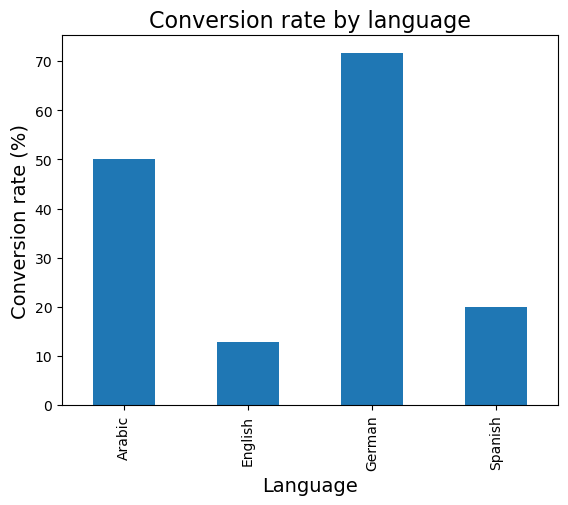

In [407]:
# create a bar chart using language_conversion_rate
language_conversion_rate.plot(kind='bar')

# Add title and x, y axis labels
plt.title('Conversion rate by language', size =16)
plt.xlabel('Language', size= 14)
plt.ylabel("Conversion rate (%)", size =14)

# Display plot
plt.show()

In [408]:
# Reset index to turn the result into df
daily_conversion_rate = pd.DataFrame(daily_conversion_rates.reset_index())

# Rename column
daily_conversion_rate.columns = ['date_served', 'conversion_rate']
daily_conversion_rate.head()

,date_served,conversion_rate
0,2018-01-01,9.94
1,2018-01-02,9.89
2,2018-01-03,10.34
3,2018-01-04,10.84
4,2018-01-05,12.54


<Figure size 640x480 with 0 Axes>

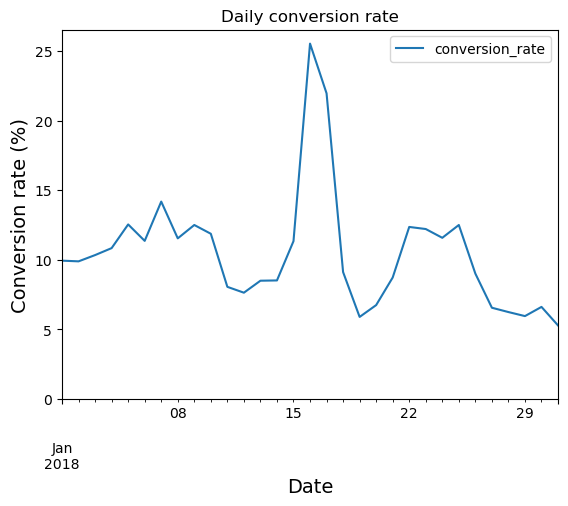

In [409]:
# Create a line plot using daily_conversion_rate
plt.clf()
daily_conversion_rate.plot('date_served','conversion_rate')

# Set title and x, y axis labels
plt.title("Daily conversion rate")
plt.xlabel('Date', size= 14)
plt.ylabel("Conversion rate (%)", size =14)

# set y axis to begin at 0
plt.ylim(0)

plt.show()

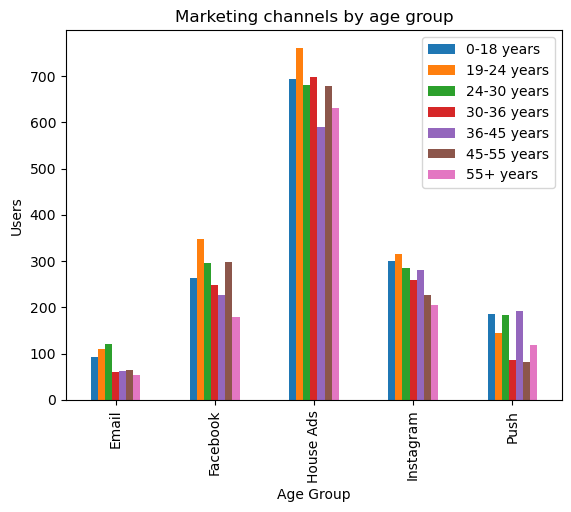

In [410]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])['user_id'].count()

# unstack channel_age and transform into df
channel_age_df = pd.DataFrame(channel_age.unstack(level=1))

# Plot 
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
# Add a legend to the plot
plt.legend(loc = 'upper right', 
           labels = channel_age_df.columns.values)
plt.show()

In [411]:
# Count the subscribers by subscribing channel and day
retention_total = marketing.groupby(['date_subscribed', 'subscribing_channel'])['user_id'].nunique()
print(retention_total.head())

# Sum the retainde subs by subs channel and date
retention_subs = marketing[marketing['is_retained'] == True].groupby(['date_subscribed', 'subscribing_channel'])['user_id'].nunique()
print(retention_subs.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
Name: user_id, dtype: int64
date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
Name: user_id, dtype: int64


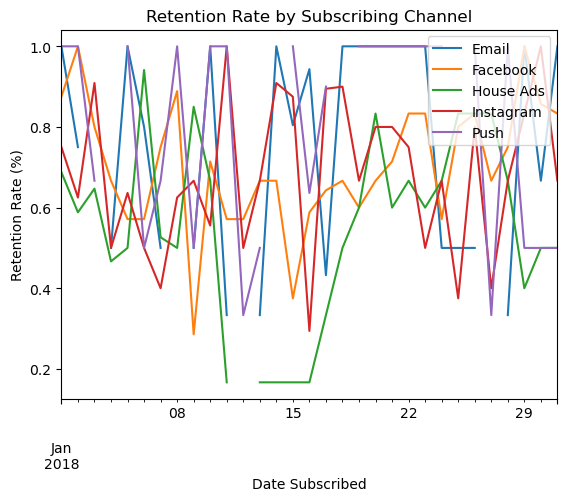

In [412]:
# Calc retention rate 
retention_rate = retention_subs / retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level = 1))

# Plot 
retention_rate_df.plot()

# Add a title, x-label, y-label, legend and display the plot
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
plt.legend(loc='upper right', labels=retention_rate_df.columns.values)
plt.show()

In [413]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted'] == True].groupby(column_names)['user_id'].nunique()

    # Total number users 
    column_total = dataframe.groupby(column_names)['user_id'].nunique()

    # Conversion rate
    conversion_rate = column_conv / column_total

    # fill missing  with 0
    conversion_rate = conversion_rate.fillna(0)

    return conversion_rate

date_served  age_group  
2018-01-01   0-18 years     0.155172
             19-24 years    0.196721
             24-30 years    0.105263
             30-36 years    0.040816
             36-45 years    0.042553
                              ...   
2018-01-31   24-30 years    0.057692
             30-36 years    0.000000
             36-45 years    0.035088
             45-55 years    0.023256
             55+ years      0.026316
Name: user_id, Length: 217, dtype: float64


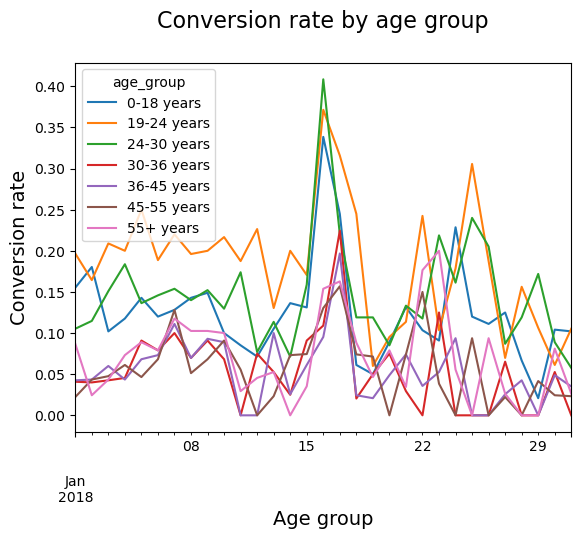

In [414]:
# Calc conv rate by age_group
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])
print(age_group_conv)

# Unstack and create df
age_group_df = pd.DataFrame(age_group_conv.unstack(level = 1))
# Visualize conversion by age_group
age_group_df.plot()
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()



In [415]:
def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by df index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        plt.xticks(rotation=45)
        # Show plot
        plt.show()
        plt.clf()


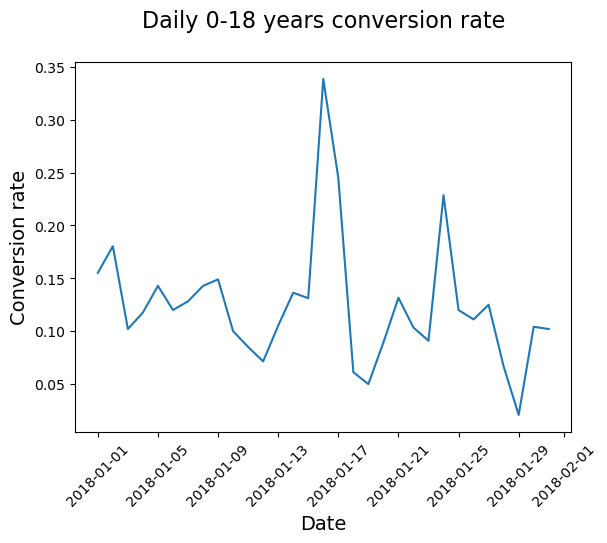

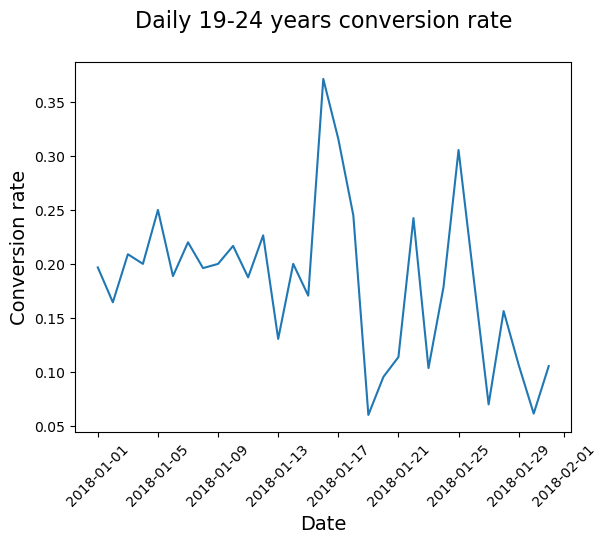

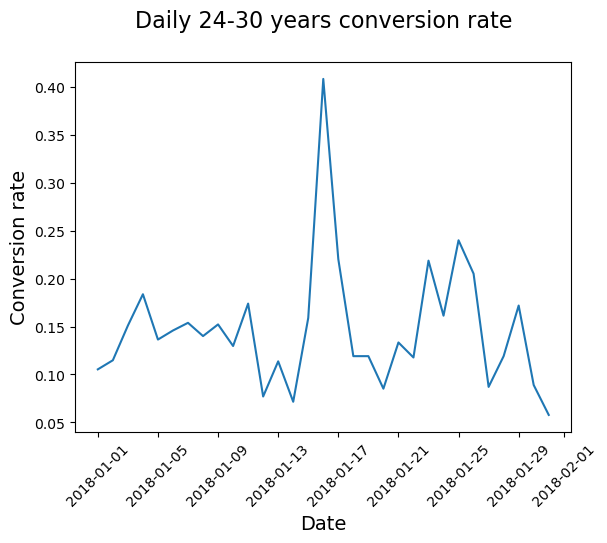

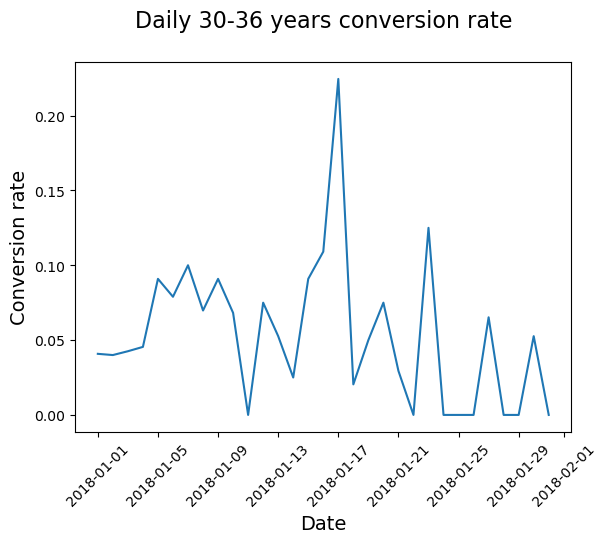

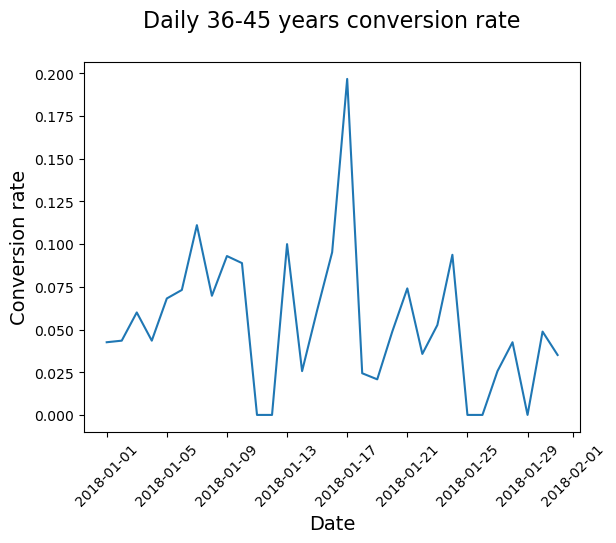

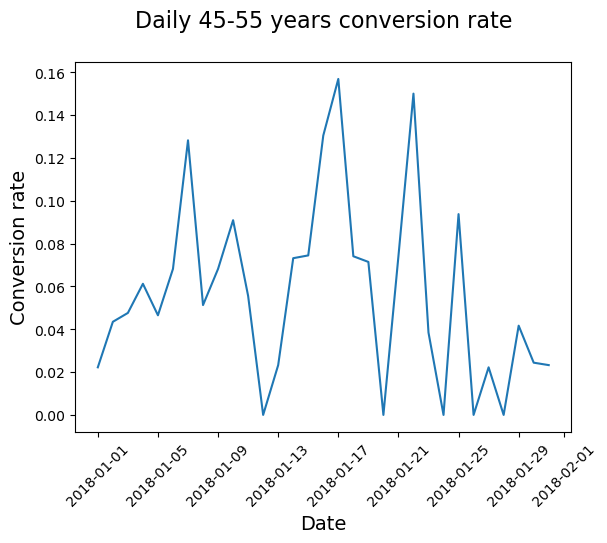

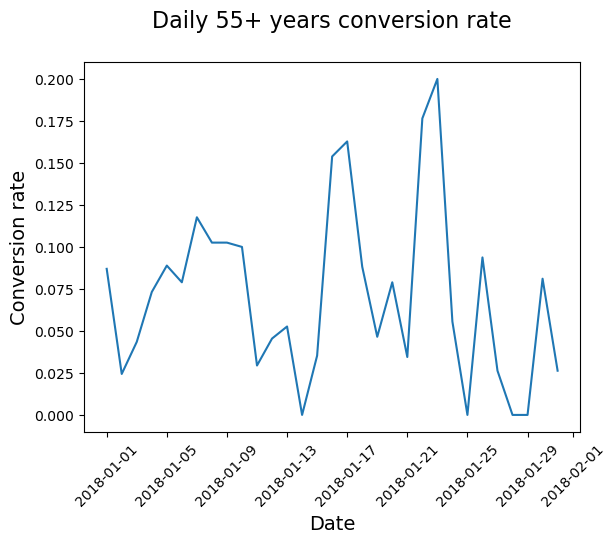

<Figure size 640x480 with 0 Axes>

In [416]:
plotting_conv(age_group_df)

In [417]:
def unstack(df):
    return pd.DataFrame(df.unstack(level=1))

date_served  marketing_channel
2018-01-01   Email                1.000000
             Facebook             0.117647
             House Ads            0.084656
             Instagram            0.106667
             Push                 0.083333
Name: user_id, dtype: float64
marketing_channel  Email  Facebook  House Ads  Instagram      Push
date_served                                                       
2018-01-01           1.0  0.117647   0.084656   0.106667  0.083333
2018-01-02           1.0  0.098361   0.077982   0.129032  0.055556
2018-01-03           0.0  0.080645   0.088542   0.171875  0.083333
2018-01-04           0.5  0.138462   0.089820   0.126984  0.058824
2018-01-05           1.0  0.112903   0.126582   0.159420  0.027778


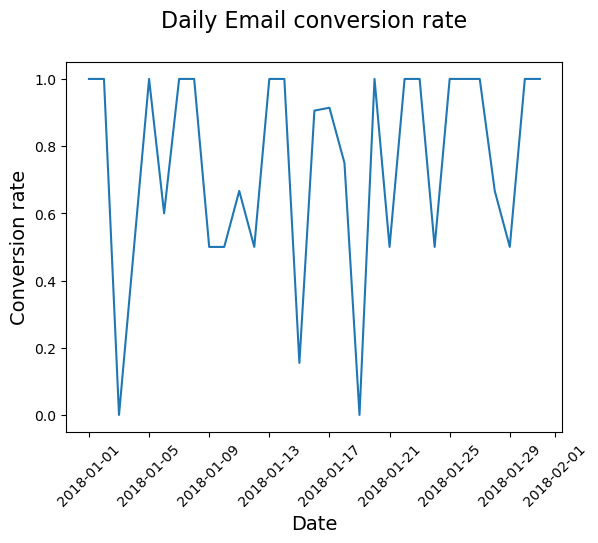

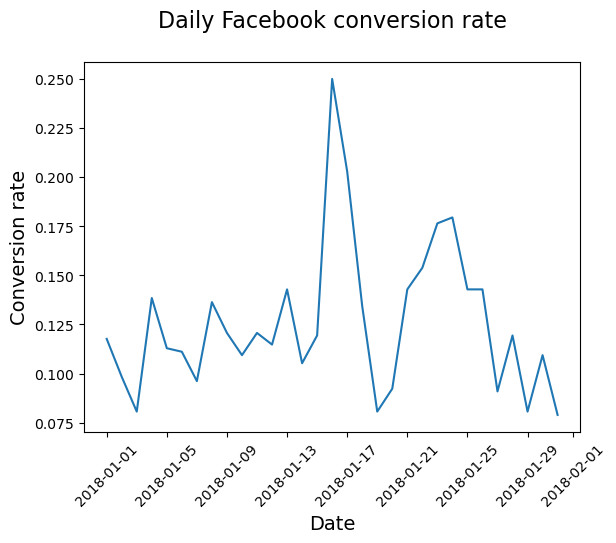

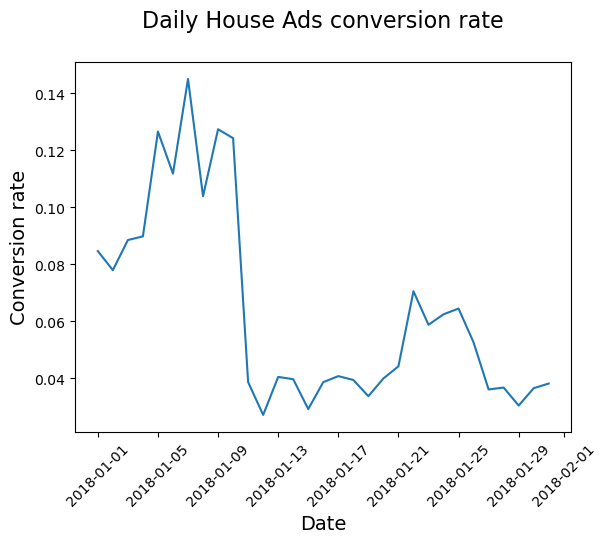

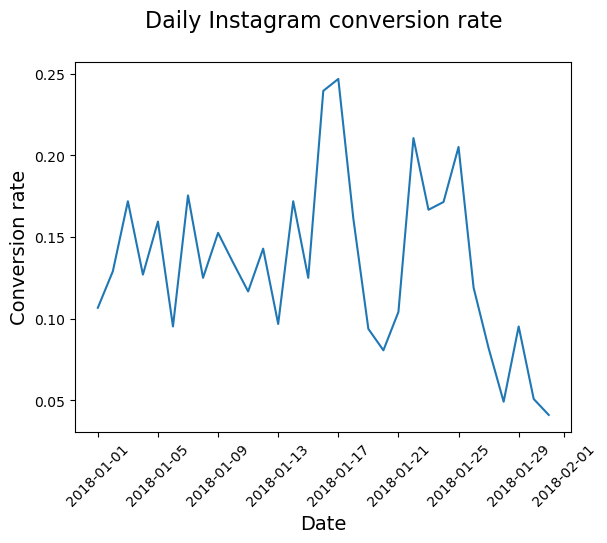

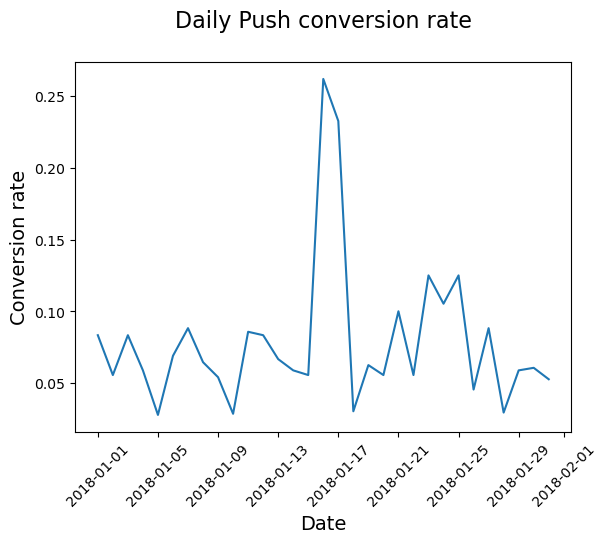

<Figure size 640x480 with 0 Axes>

In [418]:
# calc conv rate by date and marketing channel
daily_conv_channel = conversion_rate(marketing, ['date_served', 'marketing_channel'])
print(daily_conv_channel.head())

daily_conv_channel = unstack(daily_conv_channel)
print(daily_conv_channel.head())

plotting_conv(daily_conv_channel)


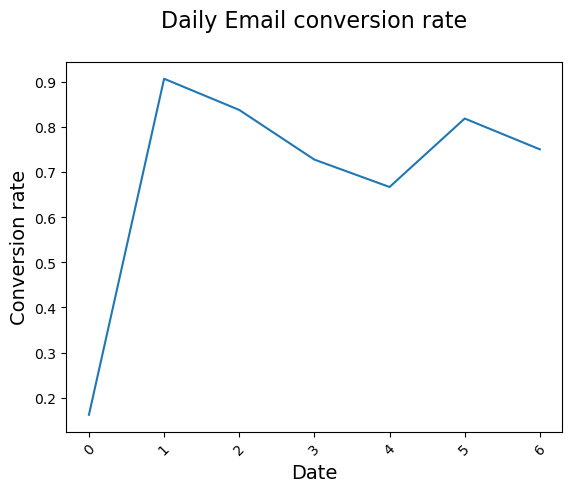

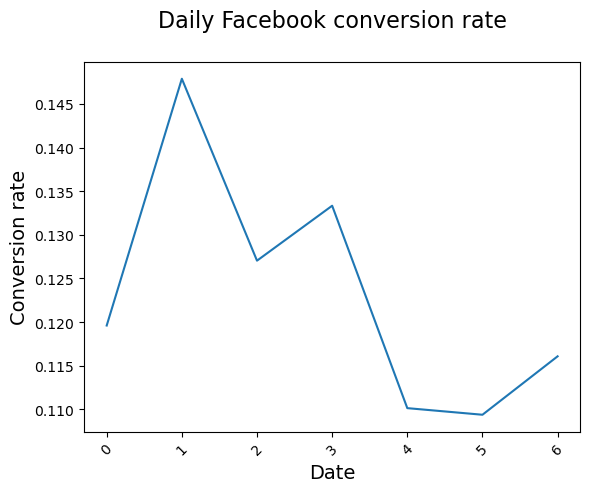

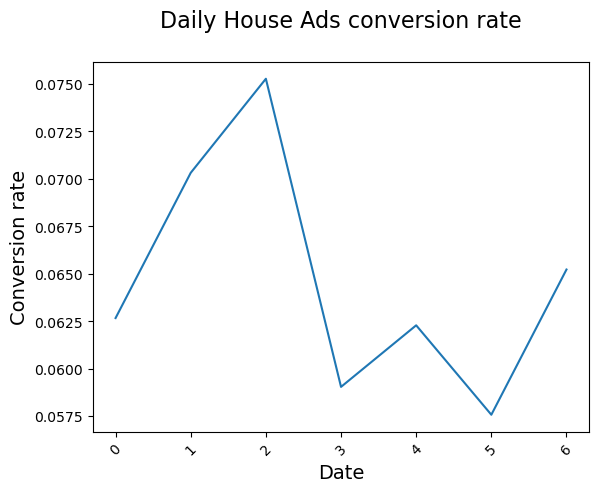

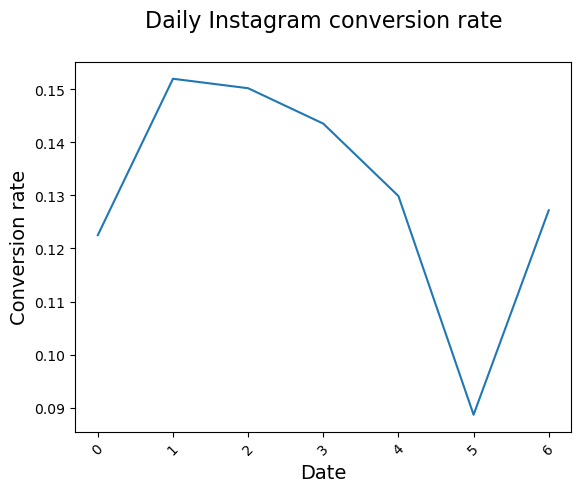

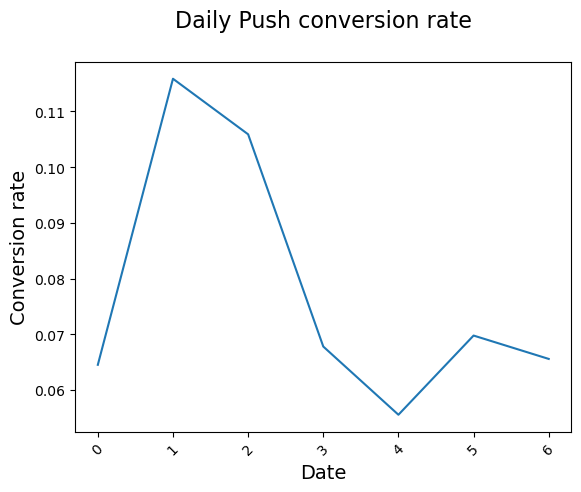

<Figure size 640x480 with 0 Axes>

In [419]:
# calc conv for day of week and channels then plot 
dow_conv = conversion_rate(marketing, ['DoW', "marketing_channel"])
dow_conv = unstack(dow_conv)
plotting_conv(dow_conv)

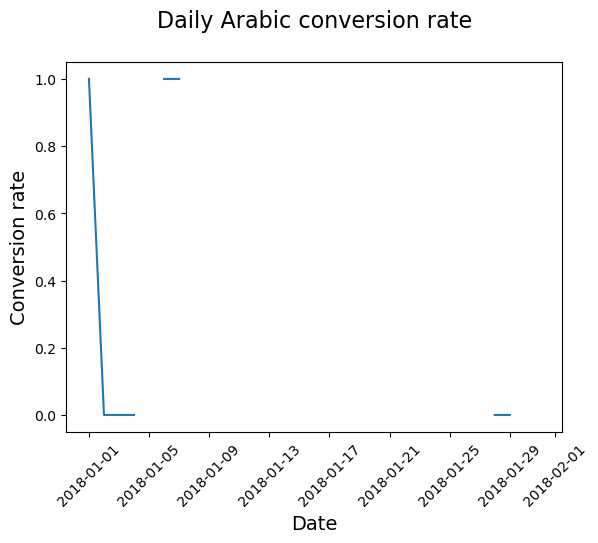

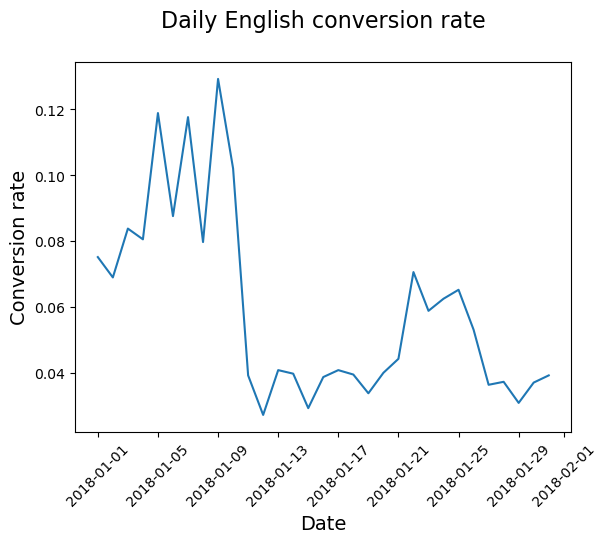

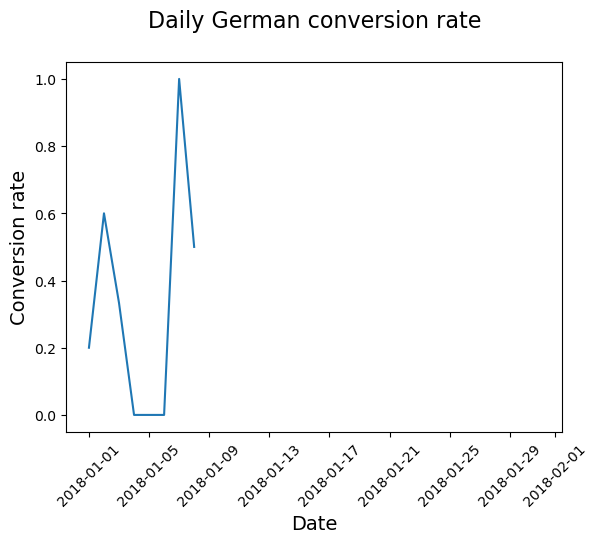

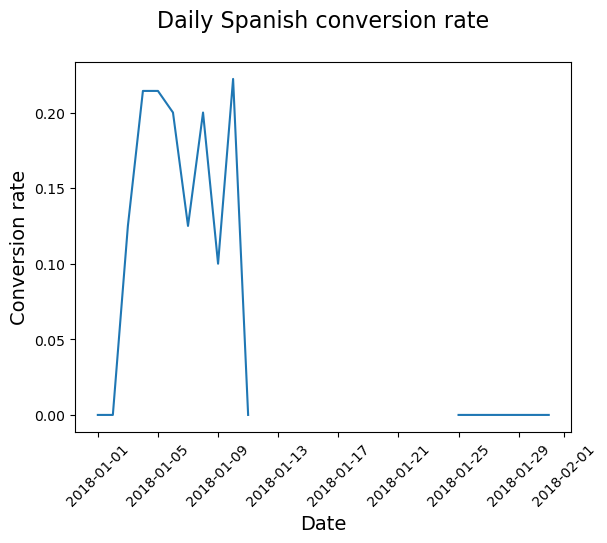

<Figure size 640x480 with 0 Axes>

In [420]:
# isolate house ads
house_ads = marketing[marketing['marketing_channel'] == "House Ads"]

# Calc conv by date and lang displayed
plotting_conv(unstack(conversion_rate(house_ads, ['date_served','language_displayed'])))



In [421]:
# Add new columns is_correct_lang
house_ads['is_correct_lang'] = np.where(
    house_ads['language_displayed'] == house_ads['language_preferred'], 
    "Yes",
    "No"
)
lang_check_df = unstack(house_ads.groupby(['date_served', 'is_correct_lang'])['user_id'].count()).fillna(0)
print(lang_check_df.head())



is_correct_lang   No    Yes
date_served                
2018-01-01       2.0  189.0
2018-01-02       3.0  247.0
2018-01-03       0.0  220.0
2018-01-04       0.0  168.0
2018-01-05       0.0  160.0


/tmp/ipykernel_10161/2531386997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_ads['is_correct_lang'] = np.where(


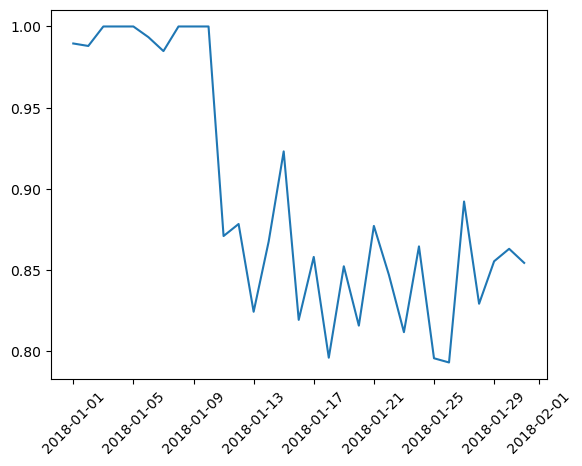

In [422]:
# check the proportion of correct languges served
lang_check_df['pct'] = lang_check_df['Yes'] / lang_check_df.sum(axis=1)

plt.plot(lang_check_df.index, lang_check_df.pct)
plt.xticks(rotation=45)
plt.show()

In [423]:
# Calculate pre-error conversion rate
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_bug, "language_displayed")

# Index other language conversion rate against English
spanish_index = lang_conv.Spanish / lang_conv.English
arabic_index = lang_conv.Arabic / lang_conv.English
german_index = lang_conv.German / lang_conv.English

print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)

Spanish index: 1.681924882629108
Arabic index: 5.045774647887324
German index: 4.485133020344287


In [424]:
# Group house_ads by date and language
converted = house_ads.groupby(['date_served',"language_preferred"])\
                        .agg({'user_id':'nunique',
                              'converted':'sum'})

# Unstack converted
converted = pd.DataFrame(converted.unstack(level=1))

In [425]:
# Create English conversion rate column for affected period
converted['english_conv_rate'] = converted.loc['2018-01-11':'2018-01-31',('converted', 'English')]


# Create expected conversion rates for each language
converted['expected_spanish_rate'] = converted['english_conv_rate'] * spanish_index
converted['expected_arabic_rate'] = converted['english_conv_rate'] * arabic_index
converted['expected_german_rate'] = converted['english_conv_rate'] * german_index

# Multiply number of users by the expected conversion rate
converted['expected_spanish_conv'] = converted['expected_spanish_rate']* converted[('user_id',"Spanish")] /100
converted['expected_arabic_conv'] = converted['expected_arabic_rate']*converted[('user_id',"Arabic")]/100
converted['expected_german_conv'] = converted['expected_german_rate']*converted[('user_id',"German")]/100

In [426]:
# Use .loc to slice only the relevant dates
converted = converted.loc['2018-01-11':'2018-01-31']

# Sum expected subscribers for each language
expected_subs = converted['expected_arabic_conv'].sum() + converted['expected_spanish_conv'].sum() + converted['expected_german_conv'].sum()

# Calculate how many subscribers we actually got
actual_subs = converted[('converted','Arabic')].sum() + converted[('converted','Spanish')].sum() + converted[('converted','German')].sum()

# Subtract how many subscribers we got despite the bug
lost_subs = expected_subs - actual_subs
print(lost_subs)

32.144143192488265


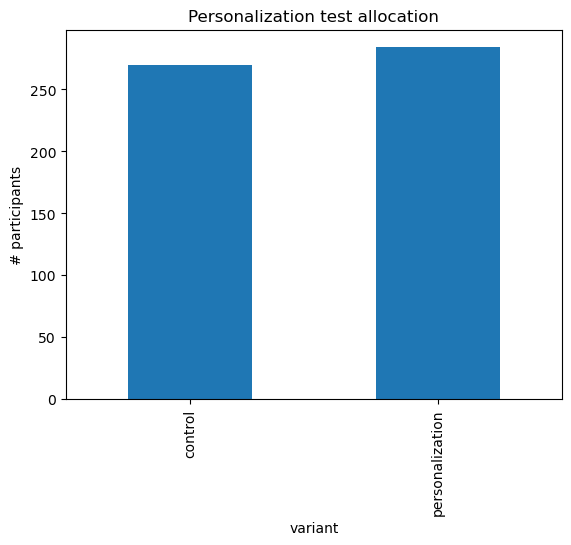

In [427]:
# Subset the DataFrame
email = marketing[marketing['marketing_channel'] == 'Email']

# Group the email DataFrame by variant 
alloc = email.groupby('variant')['user_id'].nunique()

# Plot a bar chart of the test allocation
alloc.plot(kind='bar')
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

In [428]:
# Group marketing by user_id and variant
subscribers = email.groupby(['user_id', 
                             'variant'])['converted'].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 
print(subscribers_df.isna().any())
# Drop missing values from the control column
control = subscribers_df['control'].dropna()
# Drop missing values from the personalization column
personalization = subscribers_df['personalization'].dropna()

print('Control conversion rate:', np.mean(control))
print('Personalization conversion rate:', np.mean(personalization))

variant
control            True
personalization    True
dtype: bool
Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


In [429]:
def lift(a,b):
    # Calcuate the mean of a and b
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean - a_mean ) /a_mean
  
    return str(round(lift*100, 2)) + '%'
  
# Print lift() with control and personalization as inputs
print(lift(control, personalization))

38.85%


In [435]:
from scipy import  stats

In [437]:
def ab_segmentation(segment):
  # Build a for loop for each subsegment in marketing
  for subsegment in np.unique(marketing[segment].values):
      print(subsegment)
      
      # Limit marketing to email and subsegment
      email = marketing[(marketing['marketing_channel'] == 'Email') & (marketing[segment] == subsegment)]

      subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
      subscribers = pd.DataFrame(subscribers.unstack(level=1)) 
      control = subscribers['control'].dropna()
      personalization = subscribers['personalization'].dropna()
      control = control.astype('float64')
      personalization = personalization.astype('float64')


      print('lift:', lift(control, personalization)) 
      print('t-statistic:', stats.ttest_ind(control, personalization), '\n\n')

In [438]:
# Use ab_segmentation on language displayed
ab_segmentation('language_displayed')
# Use ab_segmentation on age group
ab_segmentation('age_group')

Arabic
lift: 50.0%
t-statistic: Ttest_indResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001) 


English
lift: 39.0%
t-statistic: Ttest_indResult(statistic=-2.2183598646203215, pvalue=0.026991701290720503) 


German
lift: -1.62%
t-statistic: Ttest_indResult(statistic=0.19100834180787182, pvalue=0.8494394170062678) 


Spanish
lift: 166.67%
t-statistic: Ttest_indResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524) 


0-18 years
lift: 121.4%
t-statistic: Ttest_indResult(statistic=-2.966044912142212, pvalue=0.003872449439129706) 


19-24 years
lift: 106.24%
t-statistic: Ttest_indResult(statistic=-3.0317943847866697, pvalue=0.0030623836114689195) 


24-30 years
lift: 161.19%
t-statistic: Ttest_indResult(statistic=-3.861539544326876, pvalue=0.00018743381094867337) 


30-36 years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.185906464414798, pvalue=0.0023238487431765337) 


36-45 years
lift: -85.23%
t-statistic: Ttest_indResult(statistic=2.431790127931851, p

/tmp/ipykernel_10161/633908108.py:18: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  print('t-statistic:', stats.ttest_ind(control, personalization), '\n\n')
